Scenario # 


My daughter will be attending college in Manhattan and plans on jogging twice a week in Central Park. She would like to know which is the least and most dangerous days to go jogging. 

In [2]:
#code used to expand the width of the screen *Thank you Stevie*
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from IPython.display import display_html 

In [4]:
#Thanks for the Help Nelson
dataset= pd.read_csv ('NYPD_Arrest_Data__Year_to_Date_.csv')

In [5]:
#Code to see the columns and quick preview of available data
dataset.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [6]:
#Code to understand the Datatype for AGG reasons
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [7]:
#Code to turn the Arrest date from String to Date format
dataset['ARREST_DATE'] = pd.to_datetime(dataset['ARREST_DATE'])

In [8]:
#Code to validate the change happend
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                155507 non-null  int64         
 1   ARREST_DATE               155507 non-null  datetime64[ns]
 2   PD_CD                     155478 non-null  float64       
 3   PD_DESC                   155404 non-null  object        
 4   KY_CD                     155404 non-null  float64       
 5   OFNS_DESC                 155404 non-null  object        
 6   LAW_CODE                  155507 non-null  object        
 7   LAW_CAT_CD                154114 non-null  object        
 8   ARREST_BORO               155507 non-null  object        
 9   ARREST_PRECINCT           155507 non-null  int64         
 10  JURISDICTION_CODE         155507 non-null  int64         
 11  AGE_GROUP                 155507 non-null  object        
 12  PE

In [9]:
#Code to extract the month out of the date and add it to a new column
dataset.insert(loc=2,column='c.month',value=dataset['ARREST_DATE'].dt.month_name())
#Code to extract the Weekdayname out of the date and add it to a new column
dataset.insert(loc=3,column='c.dayname',value=dataset['ARREST_DATE'].dt.day_name())
#Code to extract the year out of the date and add it to a new column
dataset.insert(loc=4,column='c.year',value=dataset['ARREST_DATE'].dt.year)


In [10]:
#Code to see the month,dayname & year columns 
dataset.head(1)

,ARREST_KEY,ARREST_DATE,c.month,c.dayname,c.year,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,...,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,2021-12-18,December,Saturday,2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,...,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)


In [11]:
 #Code to understand the year range of the data
# >>> Since working with one year of data, there is no need to use the year column
dataset['c.year'].value_counts().sort_index()


2021    155507
Name: c.year, dtype: int64

In [13]:
#code to expand the dataframe to see all values
pd.set_option('display.max_rows',100)
#code used to be able to determine which values to filter by 
dataset['OFNS_DESC'].value_counts()

ASSAULT 3 & RELATED OFFENSES            26855
FELONY ASSAULT                          15579
PETIT LARCENY                           13178
DANGEROUS DRUGS                         10450
MISCELLANEOUS PENAL LAW                 10328
CRIMINAL MISCHIEF & RELATED OF           9294
ROBBERY                                  7848
DANGEROUS WEAPONS                        7206
GRAND LARCENY                            6671
VEHICLE AND TRAFFIC LAWS                 5264
BURGLARY                                 4895
OFFENSES AGAINST PUBLIC ADMINI           4682
OFFENSES INVOLVING FRAUD                 3832
SEX CRIMES                               3586
OFF. AGNST PUB ORD SENSBLTY &            3345
FORGERY                                  3127
INTOXICATED & IMPAIRED DRIVING           2334
POSSESSION OF STOLEN PROPERTY            1858
OTHER TRAFFIC INFRACTION                 1632
MURDER & NON-NEGL. MANSLAUGHTE           1513
FOR OTHER AUTHORITIES                    1393
OTHER OFFENSES RELATED TO THEF    

In [14]:
#Code to drop blank values in order to run a String contains statement
dataset1 = dataset.dropna()

#code to filter down to the Central Park Borough 'Manhattan'
datasetcentralpark = dataset1[dataset1['ARREST_BORO']=='M']

#code that creates a LIST of selected text
searchfor = ['SEX','KIDNAPPING','RAPE','HARRASSMENT','ROBBERY']

#Code which runs a nested string contain function with a join to the list that filters down the dataset
datasetfilter = datasetcentralpark[datasetcentralpark['OFNS_DESC'].str.contains('|'.join(searchfor))]

In [15]:
#Code to see the new filter by types
datasetfilter['OFNS_DESC'].value_counts()

ROBBERY                            2088
SEX CRIMES                          724
RAPE                                105
HARRASSMENT 2                        17
KIDNAPPING & RELATED OFFENSES        14
KIDNAPPING                            3
FELONY SEX CRIMES                     2
KIDNAPPING AND RELATED OFFENSES       1
Name: OFNS_DESC, dtype: int64

Wednesday    575
Tuesday      505
Thursday     467
Friday       454
Monday       401
Saturday     302
Sunday       250
Name: c.dayname, dtype: int64


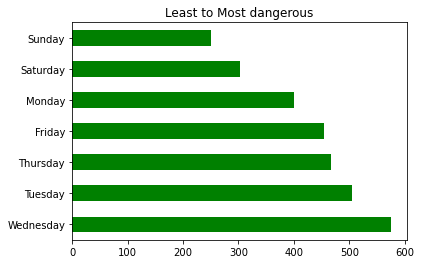

In [19]:
table = datasetfilter['c.dayname'].value_counts()
datasetfilter['c.dayname'].value_counts().plot.barh(width=0.5,color=['green'],title='Least to Most dangerous')
print(table)